In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
price_file = open('historicalprices', 'r')
inf_price_file = open('historicalpricesinflationadjusted', 'r')
earnings_file = open('yield', 'r')
dividend_file = open('dividend', 'r')

price_raw = price_file.readlines()
inf_price_raw = inf_price_file.readlines()
earnings_raw = earnings_file.readlines()
dividend_raw = dividend_file.readlines()

pricen = []
inf_pricen = []
earningsn = []
dividendn = []

In [4]:
def to_number(string):
    string_price = string[12:-1]
    clean_string = ''
    for i in range(len(string_price)):
        if string_price[i] != ",":
            clean_string += string_price[i]
    return float(clean_string)

def to_percent(string):
    string_percent = string[12:-1]
    clean_string = ''
    for i in range(len(string_percent)):
        if string_percent[i] != "%":
            clean_string += string_percent[i]
    return float(clean_string)/100

In [5]:
for index in range(len(price_raw)):
    pricen.append(to_number(price_raw[index]))
pricen.reverse()
pricen = pricen[:-1]
print(len(pricen))
for index in range(len(inf_price_raw)):
    inf_pricen.append(to_number(inf_price_raw[index]))
inf_pricen.reverse()
inf_pricen = inf_pricen[:-1]
print(len(inf_pricen))
for index in range(len(earnings_raw)):
    earningsn.append(to_percent(earnings_raw[index]))
earningsn.reverse()
earningsn = earningsn[:-1]
print(len(earningsn))
for index in range(len(dividend_raw)):
    dividendn.append(to_percent(dividend_raw[index]))
dividendn.reverse()
print(len(dividendn))

151
151
151
151


In [6]:
inflation = []
for i in range(len(pricen)):
    inflation.append(pricen[i]/inf_pricen[i])
print(len(inflation))

151


In [7]:
abse = []
for i in range(len(pricen)):
    abse.append(pricen[i]*earningsn[i])
print(len(abse))

151


In [8]:
eg = []
for i in range(len(abse)-1):
    eg.append(abse[i+1]-abse[i])
eg.append(1)
print(len(eg))

151


In [9]:
re = []
for i in range(len(earningsn)):
    re.append((earningsn[i]-dividendn[i])*pricen[i])
print(len(re))

151


In [10]:
roi = []
for i in range(len(eg)-1):
    roi.append(eg[i+1]/re[i])
roi.append(0.1)
print(len(roi))

151


In [11]:
numbers = {'eyield': earningsn, 'dyield': dividendn, 'iprices': inf_pricen, 'prices': pricen, 'inflation': inflation, 'earnings': abse, 'earnings growth': eg, 'retained earnings': re, 'return on investment': roi}
df = pd.DataFrame(numbers)

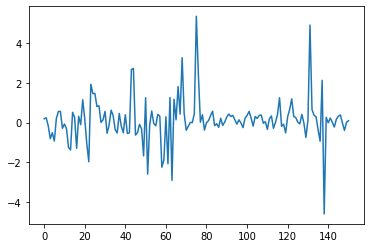

In [12]:
plt.plot(df['return on investment'])

In [13]:
df['return on investment'].mean()

0.133326876193098